In [1]:
#Librerias utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Lectura del archivo de datos
df = pd.DataFrame( pd.read_csv("vid18_180219.dat") )
#Se toman las columnas relevantes para el análisis
df=df.filter(items=["TIMESTAMP","AirTC_Avg"], axis=1)

df.head()

,TIMESTAMP,AirTC_Avg
0,2018-05-11 20:10:00,23.50
1,2018-05-11 20:20:00,22.96
2,2018-05-11 20:30:00,22.73
3,2018-05-11 20:40:00,22.40
4,2018-05-11 20:50:00,22.46


In [3]:
#Creando columna de tipo fecha a partir de la columna TIMESTAMP
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['TIMESTAMP'], 1), dayfirst=True)
#Borrando la columna TIMESTAMP
df = df.drop(['TIMESTAMP'], 1)

#Creando columnas para hora, día, mes y año.
df['HORA'] = df['FECHA'].dt.hour
df['DIA'] = df['FECHA'].dt.day
df['MES'] = df['FECHA'].dt.month
df['AÑO'] = df['FECHA'].dt.year
df.head()

,AirTC_Avg,FECHA,HORA,DIA,MES,AÑO
0,23.50,2018-05-11 20:10:00,20,11,5,2018
1,22.96,2018-05-11 20:20:00,20,11,5,2018
2,22.73,2018-05-11 20:30:00,20,11,5,2018
3,22.40,2018-05-11 20:40:00,20,11,5,2018
4,22.46,2018-05-11 20:50:00,20,11,5,2018


In [4]:
#Creando un dataframe con la fecha a partir del 1ero de noviembre del 2018
df0=df[(df["FECHA"] >= "2018-11-1")]

#Reseteando los índices y borrando la columna 'index'
df0=df0.reset_index()
df0 = df0.drop(['index'], 1)

#Cambiando el nombre de la columna 'AirTC_Avg' a 'TEMP'
df0['TEMP'] = df0['AirTC_Avg']
df0 = df0.drop(['AirTC_Avg' ], 1)

df0.head()

,FECHA,HORA,DIA,MES,AÑO,TEMP
0,2018-11-01 00:00:00,0,1,11,2018,9.13
1,2018-11-01 00:10:00,0,1,11,2018,8.89
2,2018-11-01 00:20:00,0,1,11,2018,8.66
3,2018-11-01 00:30:00,0,1,11,2018,8.52
4,2018-11-01 00:40:00,0,1,11,2018,8.47


In [8]:
#Calcular el promedio de temperatura por hora y se agrega como columna a un nuevo dataframe
#Calcular la temperatura maxima y minima por dia
df0["TEMP_prom"]= np.round(df0.groupby(["AÑO","MES","DIA","HORA"])["TEMP"].transform("mean"),decimals=1)
df0["TMAX"] = np.round(df0.groupby(["AÑO","MES","DIA"])["TEMP"].transform("max"),decimals=1)
df0["TMIN"] = np.round(df0.groupby(["AÑO","MES","DIA"])["TEMP"].transform("min"),decimals=1)
df0["HORA"]=df0.HORA
df0["DIA"]=df0.DIA
df0["MES"]=df0.MES
df0["AÑO"]=df0.AÑO
df0 = df0.drop(['FECHA'], 1)
df0.head(10)

,HORA,DIA,MES,AÑO,TEMP,TEMP_prom,TMAX,TMIN
0,0,1,11,2018,9.13,8.7,29.6,6.1
1,0,1,11,2018,8.89,8.7,29.6,6.1
2,0,1,11,2018,8.66,8.7,29.6,6.1
3,0,1,11,2018,8.52,8.7,29.6,6.1
4,0,1,11,2018,8.47,8.7,29.6,6.1
5,0,1,11,2018,8.58,8.7,29.6,6.1
6,1,1,11,2018,8.56,8.5,29.6,6.1
7,1,1,11,2018,8.32,8.5,29.6,6.1
8,1,1,11,2018,8.15,8.5,29.6,6.1
9,1,1,11,2018,8.25,8.5,29.6,6.1


In [9]:
#Se eliminan las repeticiones en los datos
df0 = df0.drop_duplicates(subset=['AÑO','MES','DIA','HORA'])
df0=df0.reset_index(drop=True)
df0.head()

,HORA,DIA,MES,AÑO,TEMP,TEMP_prom,TMAX,TMIN
0,0,1,11,2018,9.130,8.7,29.6,6.1
1,1,1,11,2018,8.560,8.5,29.6,6.1
2,2,1,11,2018,8.830,8.7,29.6,6.1
3,3,1,11,2018,9.130,8.8,29.6,6.1
4,4,1,11,2018,7.924,7.4,29.6,6.1


In [11]:
#Cálculo de las Unidades de Frío (UF)
UF = []
for i in range(0,len(df0)):
    if(df0['TEMP_prom'][i]<=1.4):
        UF.append(0.0)
    elif(1.5<=df0['TEMP_prom'][i]<=2.4):
        UF.append(0.5)
    elif(2.5<=df0['TEMP_prom'][i]<=9.1):
        UF.append(1.0)
    elif(9.2<=df0['TEMP_prom'][i]<=12.4):
        UF.append(0.5)
    elif(12.5<=df0['TEMP_prom'][i]<=15.9):
        UF.append(0.0)
    elif(12.5<=df0['TEMP_prom'][i]<=15.9):
        UF.append(0.0)
    elif(16.0<=df0['TEMP_prom'][i]<=18.0):
        UF.append(-0.5)
    elif(18.0<=df0['TEMP_prom'][i]):
        UF.append(-1.0)

In [12]:
print(UF)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.5, 0.5, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, -0.5, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, -0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0

In [14]:
#Se añade la columna de UF
df0['UF']=UF

#Cálculo de UF24: Suma diaria de UF
df0["UF24"] = df0.groupby(["AÑO","MES","DIA"])["UF"].transform("sum")

#Eliminación de repetidos
df0 = df0.drop_duplicates(subset=['AÑO','MES','DIA'])
df0=df0.reset_index(drop=True)

df0.head()

,HORA,DIA,MES,AÑO,TEMP,TEMP_prom,TMAX,TMIN,UF,UF24
0,0,1,11,2018,9.13,8.7,29.6,6.1,1.0,-0.5
1,0,2,11,2018,10.79,10.6,31.4,10.0,0.5,-9.0
2,0,3,11,2018,12.85,12.5,30.5,10.2,0.0,-9.5
3,0,4,11,2018,13.14,12.7,31.4,11.2,0.0,-11.5
4,0,5,11,2018,14.41,13.9,31.2,11.1,0.0,-8.0


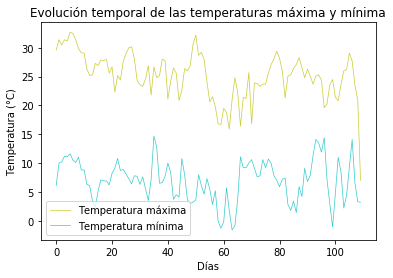

In [23]:
#Cálculo de UF24 acumulado
df0['UF24_acumulado']=np.cumsum(df0['UF24'])

TMAX = [df0['TMAX'][i] for i in range(0,len(df0))]
TMIN = [df0['TMIN'][i] for i in range(0,len(df0))]
UF24_acumulado = [df0['UF24_acumulado'][i] for i in range(0,len(df0))]


#Gráfica de la evolución de las temperaturas máxima y mínima
plt.plot(TMAX, label = "Temperatura máxima", color = 'y', alpha=0.8, linewidth=0.7 )
plt.plot(TMIN, label = "Temperatura mínima", color = 'c', alpha=0.8, linewidth=0.7 )   
plt.xlabel("Días")   
plt.ylabel("Temperatura (°C)")  
plt.legend()
plt.title('Evolución temporal de las temperaturas máxima y mínima')
plt.savefig('temperaturas',plt=2000)
plt.show()

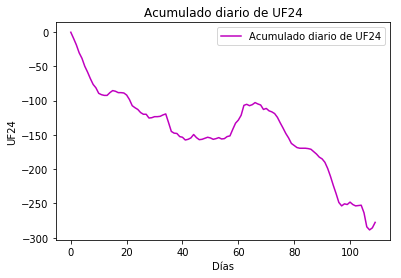

In [24]:
#Gráfica de evolución de UF24
plt.plot(UF24_acumulado, label = "Acumulado diario de UF24", color = 'm')   
plt.xlabel("Días")   
plt.ylabel("UF24")  
plt.legend()
plt.title('Acumulado diario de UF24')
plt.savefig('uf24',plt=2000)
plt.show()